In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# **Load Boston House Pricing Dataset**

    - CRIM : per capita crime rate by town

    - ZN : proportion of residential land zoned for lots over 25,000 sq.ft.

    - INDUS : proportion of non-retail business acres per town.

    - CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)

    - NOX : nitric oxides concentration (parts per 10 million)

    - RM : average number of rooms per dwelling

    - AGE : proportion of owner-occupied units built prior to 1940

    - DIS : weighted distances to five Boston employment centres

    - RAD : index of accessibility to radial highways

    - TAX : full-value property-tax rate per $10,000.

    - PTRATIO : pupil-teacher ratio by town

    - B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

    - LSTAT : % lower status of the population

    - MEDV : Median value of owner-occupied homes in $1000's

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.shape

(506, 14)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
a = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
for i in a:
    mean_value=df[i].mean()
    df[i].fillna(value=mean_value, inplace=True)

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## **Exploratory data analysis**

- Correlation

In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


<Axes: >

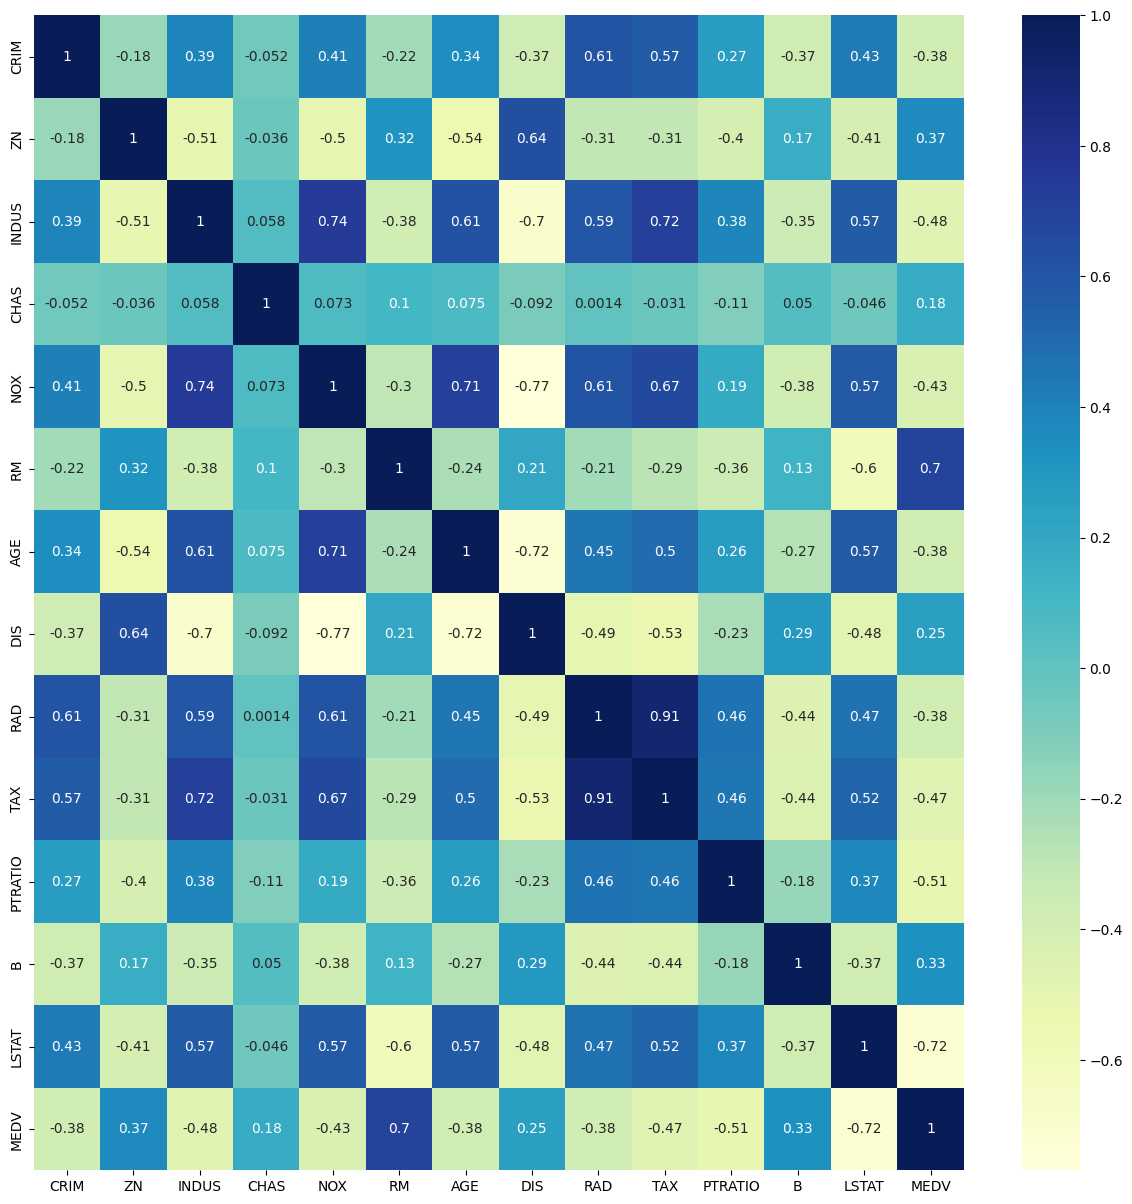

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

/home/kashyap/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


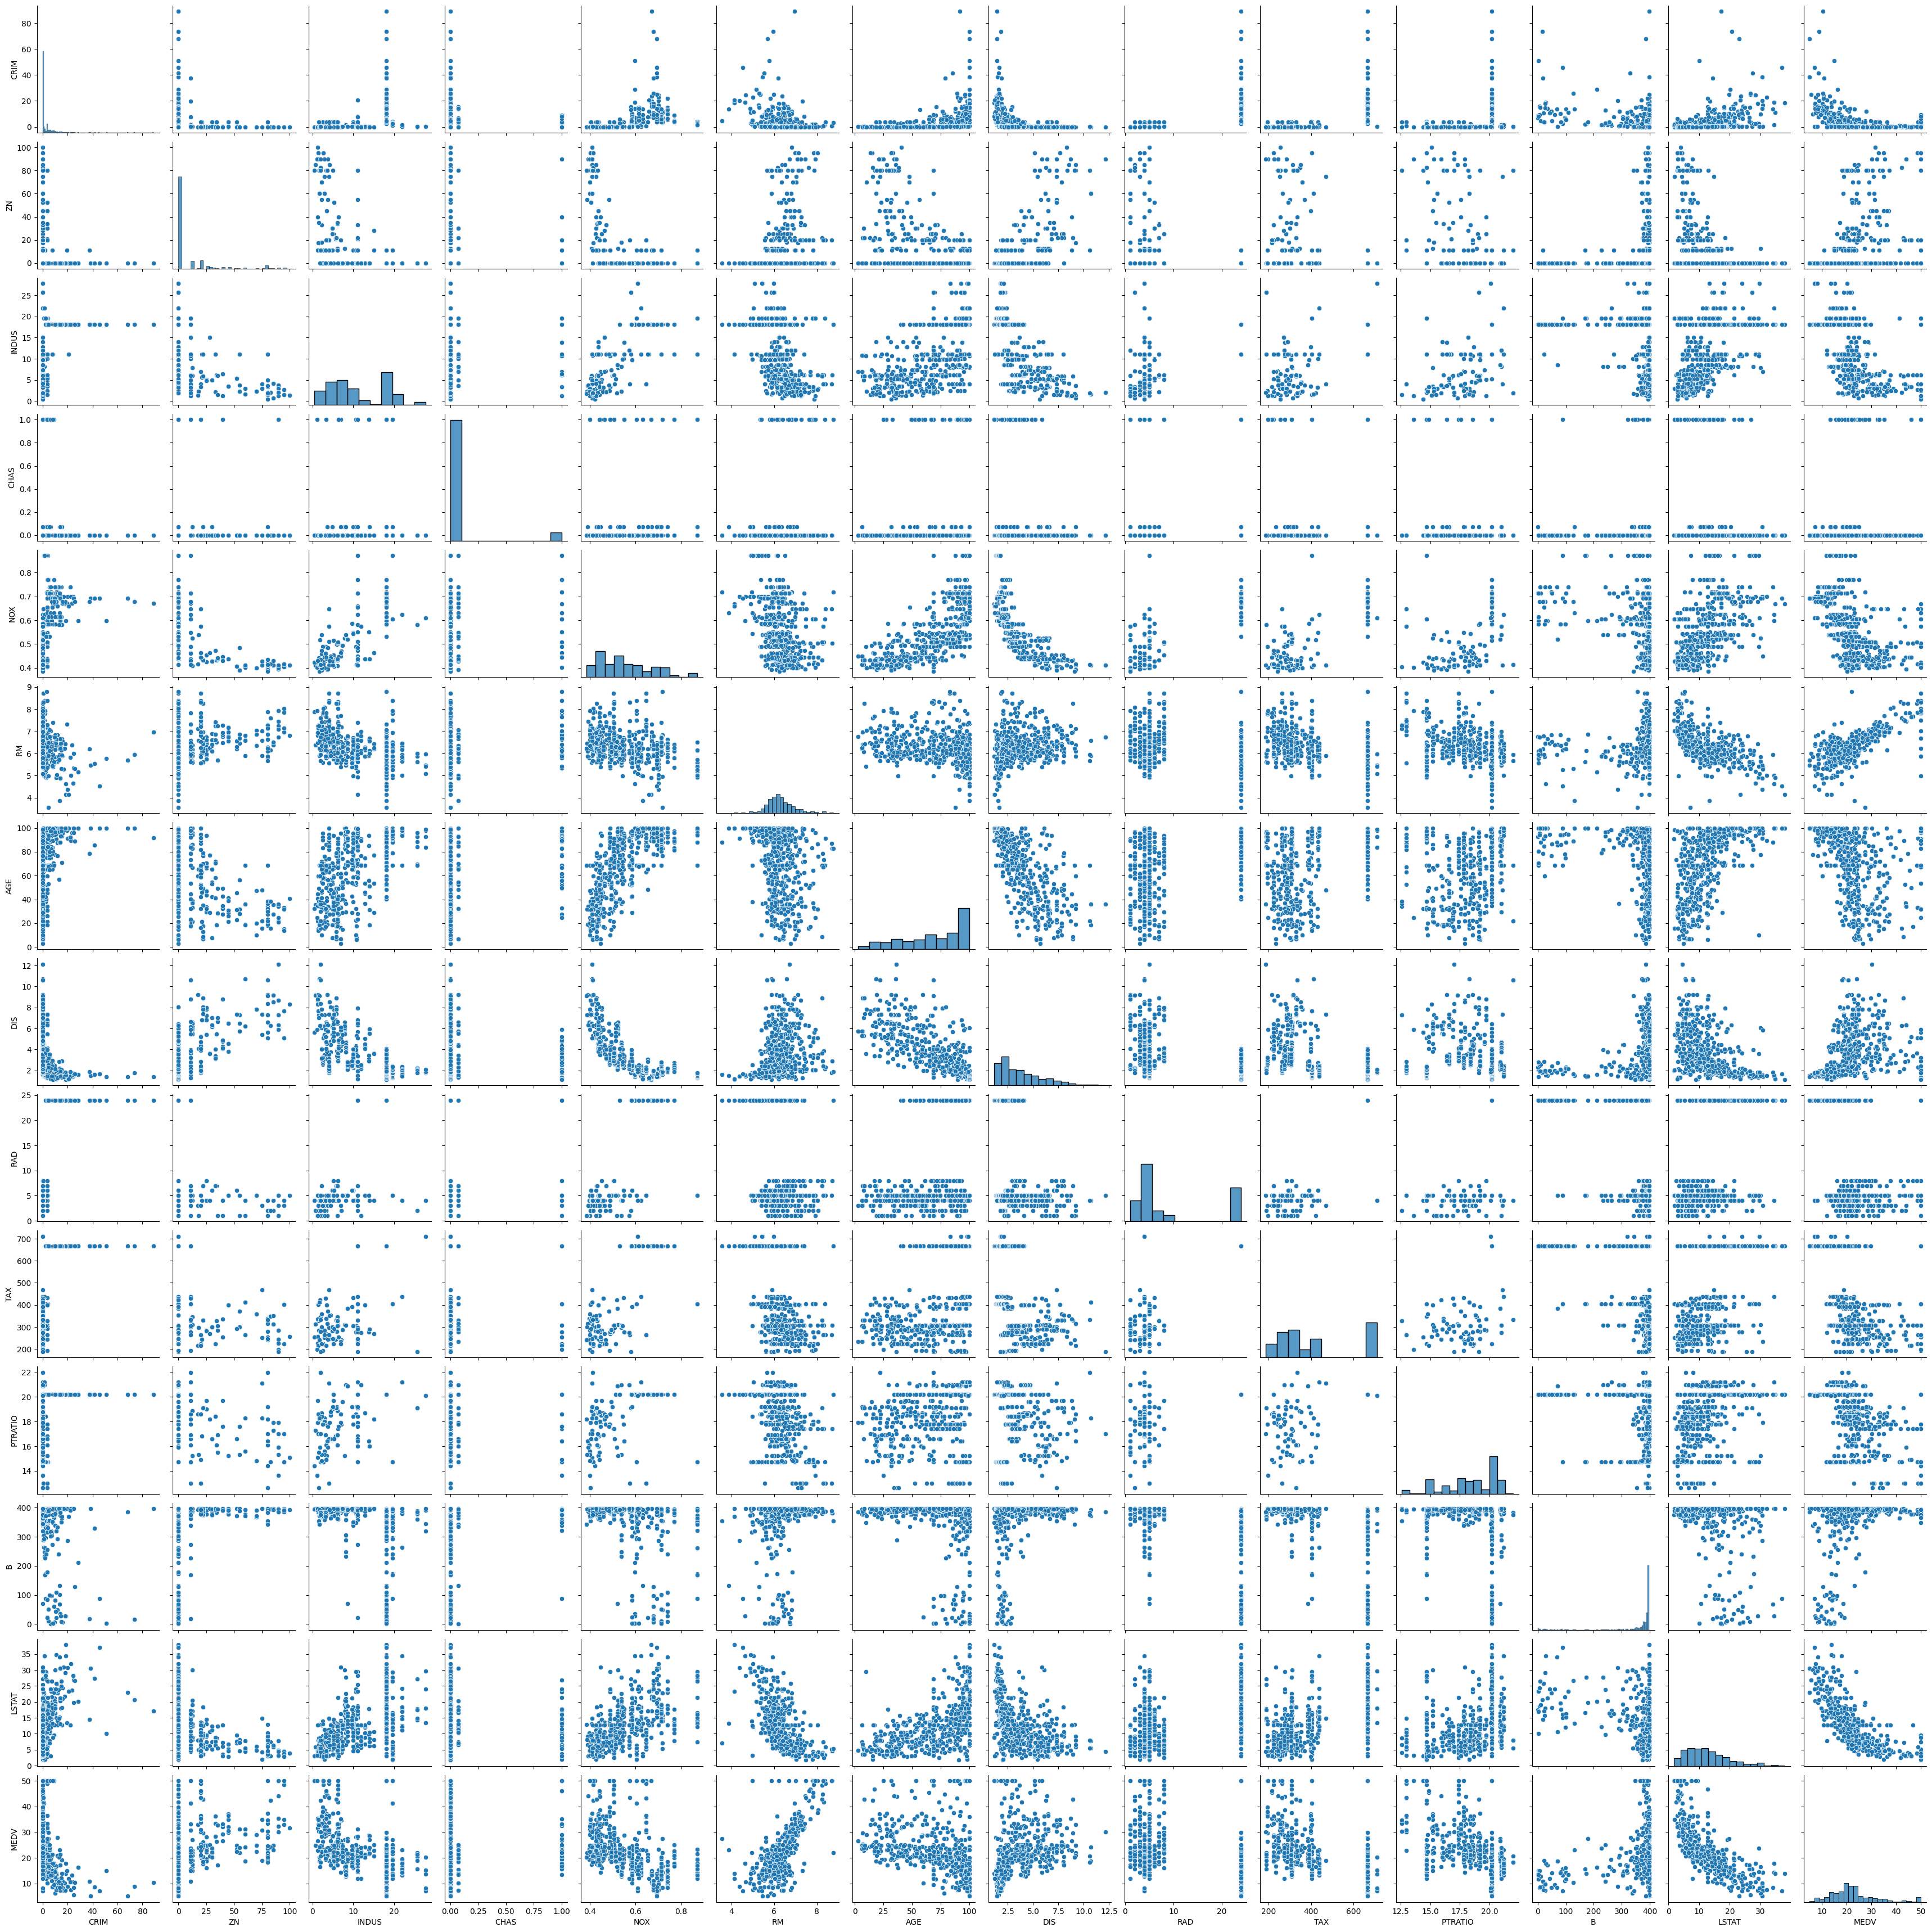

In [14]:
sns.pairplot(df)

----------------------------------------------------------------------------------------------------


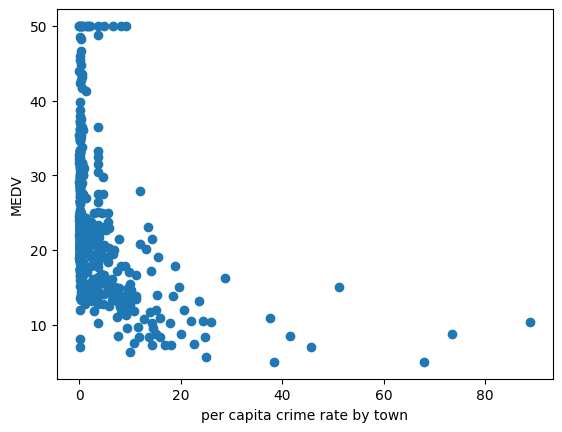

----------------------------------------------------------------------------------------------------


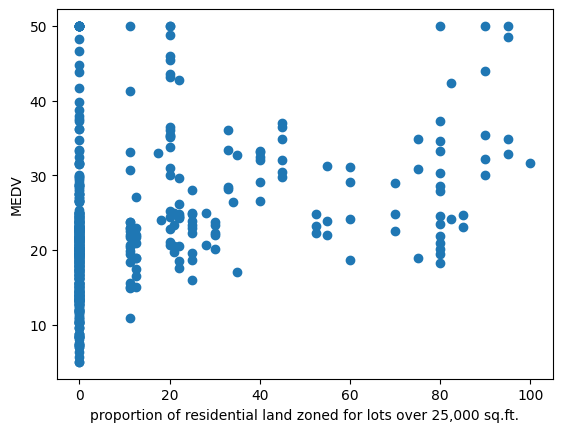

----------------------------------------------------------------------------------------------------


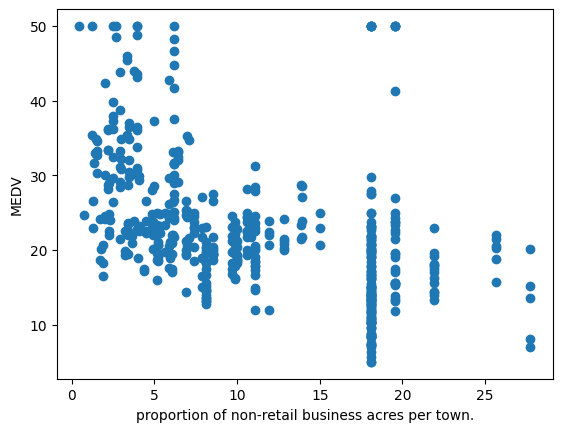

----------------------------------------------------------------------------------------------------


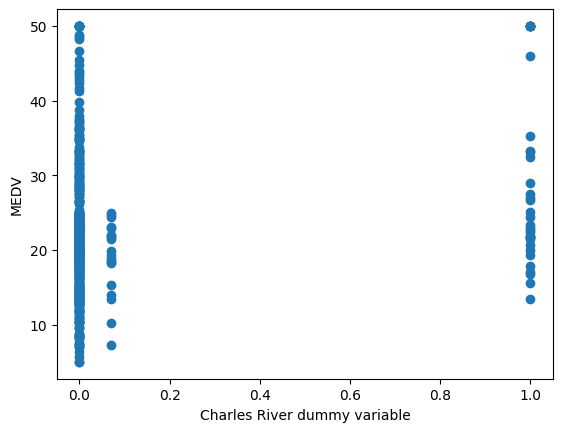

----------------------------------------------------------------------------------------------------


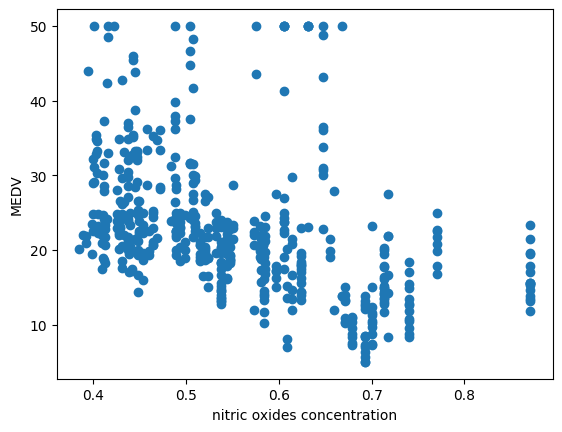

----------------------------------------------------------------------------------------------------


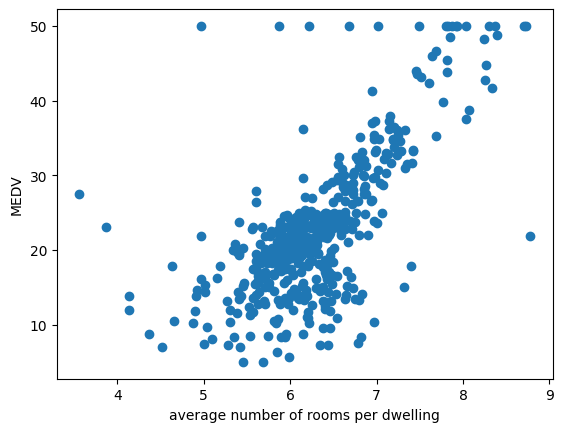

----------------------------------------------------------------------------------------------------


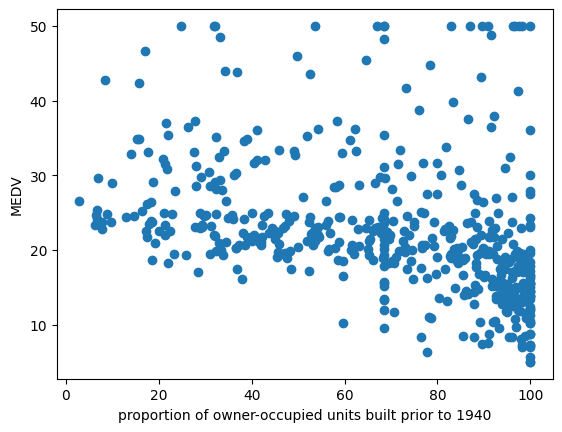

----------------------------------------------------------------------------------------------------


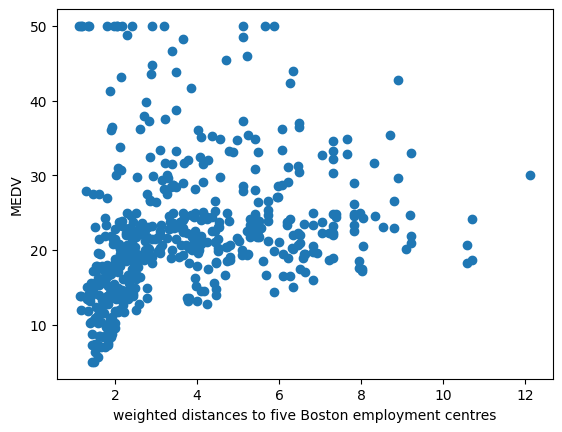

----------------------------------------------------------------------------------------------------


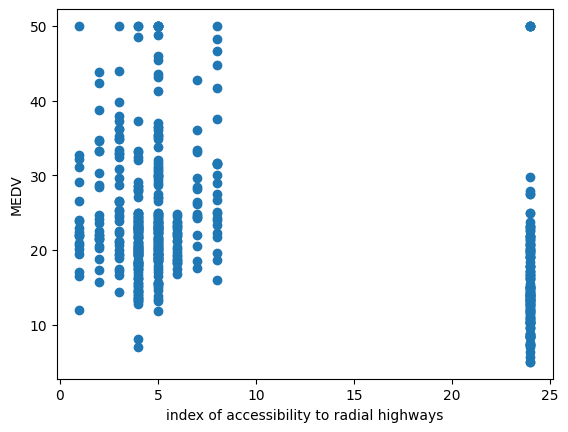

----------------------------------------------------------------------------------------------------


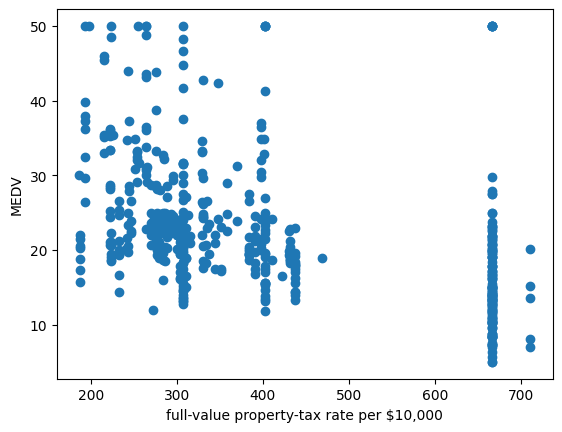

----------------------------------------------------------------------------------------------------


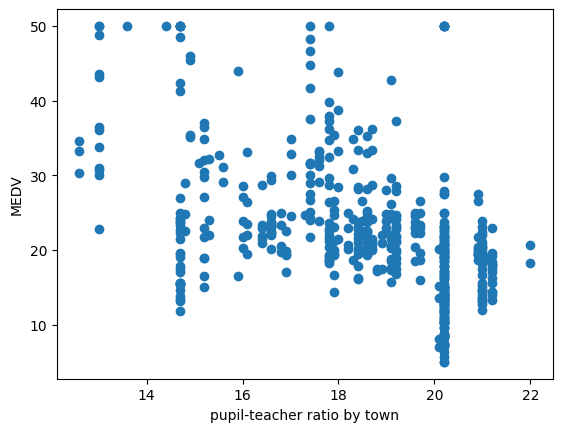

----------------------------------------------------------------------------------------------------


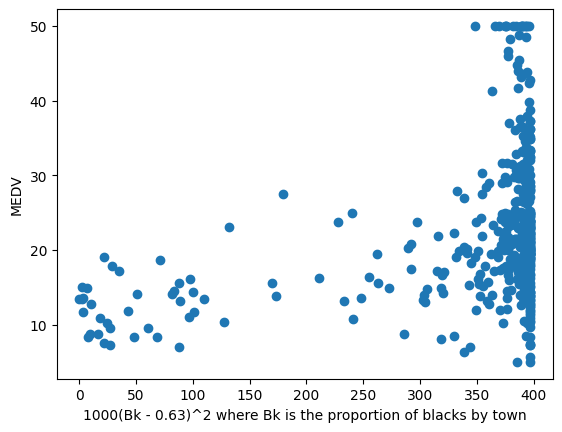

----------------------------------------------------------------------------------------------------


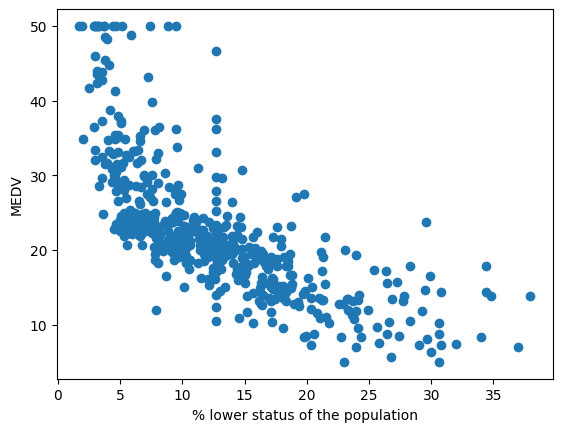

----------------------------------------------------------------------------------------------------


In [15]:
a = list(df.columns)
a.remove('MEDV')
b = ['per capita crime rate by town',
     'proportion of residential land zoned for lots over 25,000 sq.ft.',
     'proportion of non-retail business acres per town.',
     'Charles River dummy variable',
     'nitric oxides concentration',
     'average number of rooms per dwelling',
     'proportion of owner-occupied units built prior to 1940',
     'weighted distances to five Boston employment centres',
     'index of accessibility to radial highways',
     'full-value property-tax rate per $10,000',
     'pupil-teacher ratio by town',
     '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
     '% lower status of the population'
    ]

print('-'*100)
for i in range(len(a)):
    plt.scatter(df[a[i]], df['MEDV'])
    plt.xlabel(b[i])
    plt.ylabel('MEDV')
    plt.show()
    print('-'*100)

----------------------------------------------------------------------------------------------------


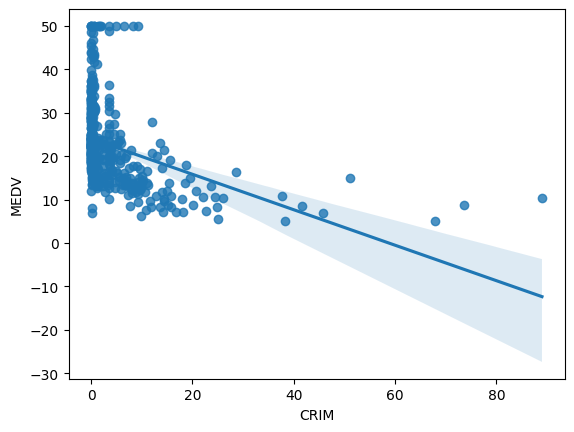

----------------------------------------------------------------------------------------------------


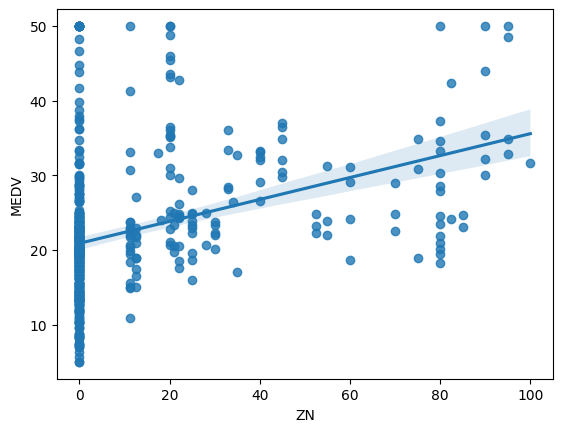

----------------------------------------------------------------------------------------------------


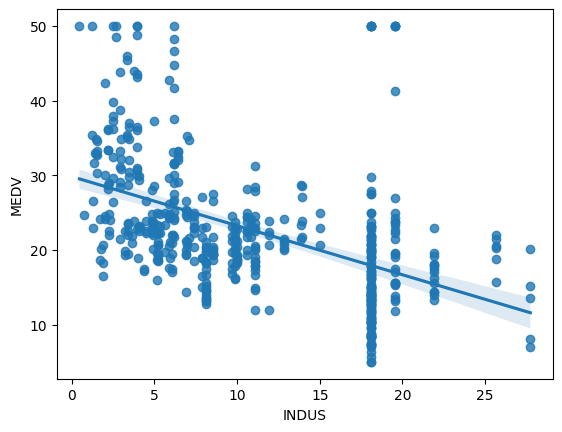

----------------------------------------------------------------------------------------------------


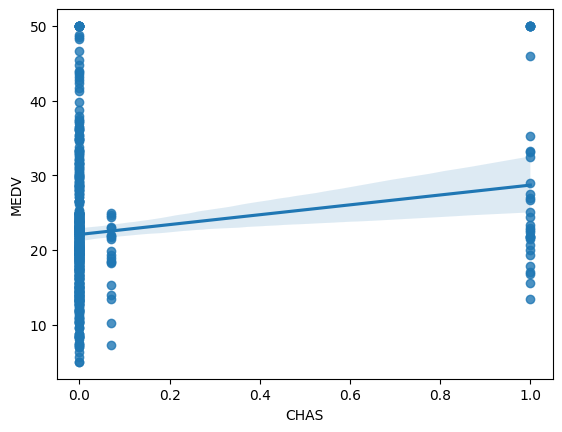

----------------------------------------------------------------------------------------------------


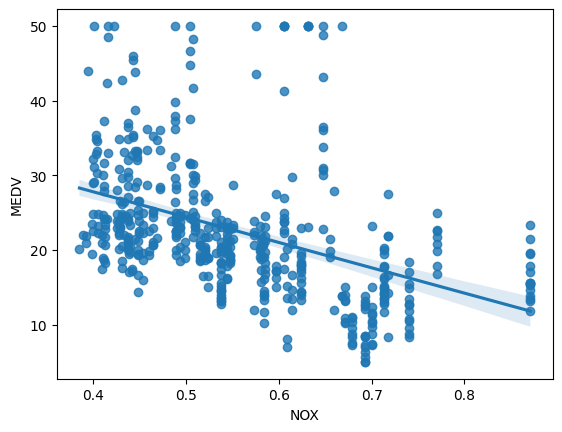

----------------------------------------------------------------------------------------------------


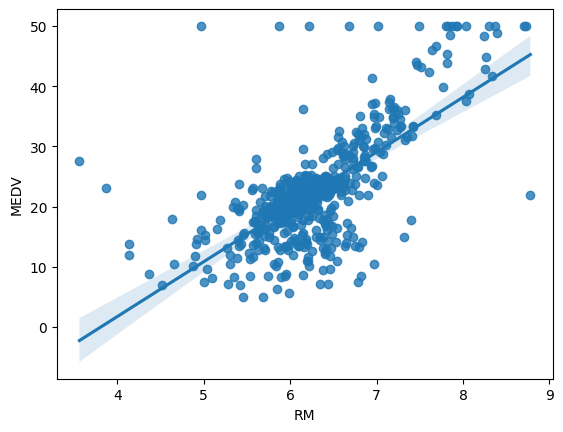

----------------------------------------------------------------------------------------------------


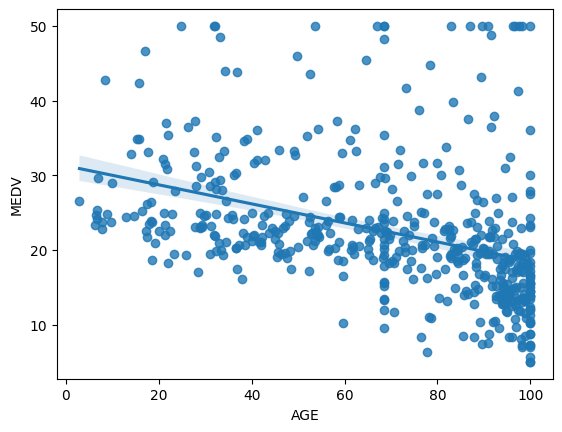

----------------------------------------------------------------------------------------------------


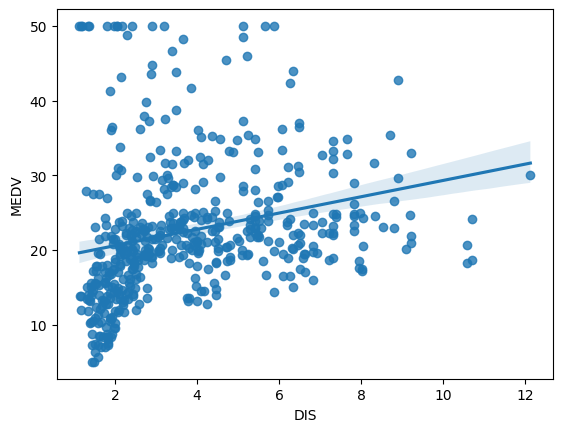

----------------------------------------------------------------------------------------------------


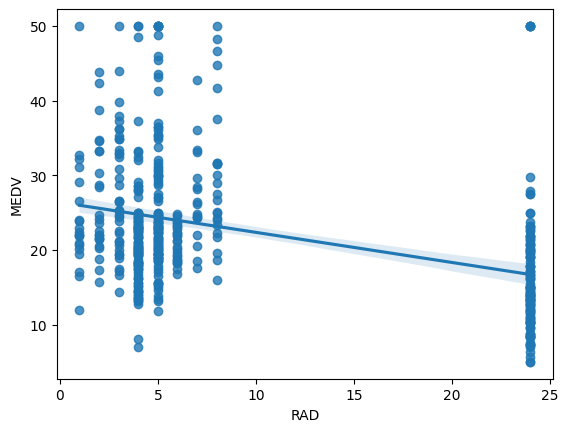

----------------------------------------------------------------------------------------------------


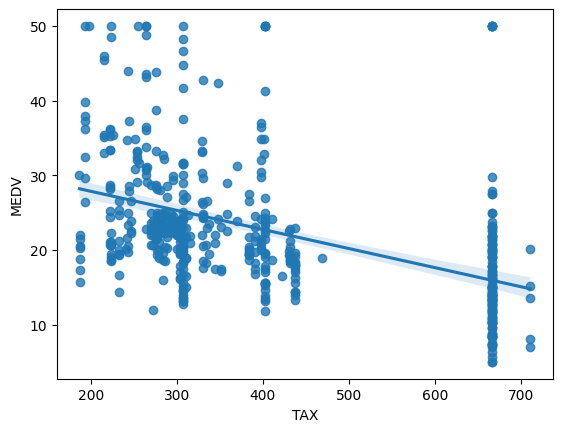

----------------------------------------------------------------------------------------------------


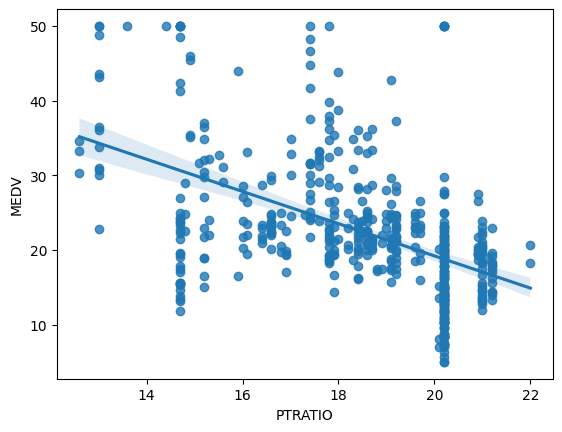

----------------------------------------------------------------------------------------------------


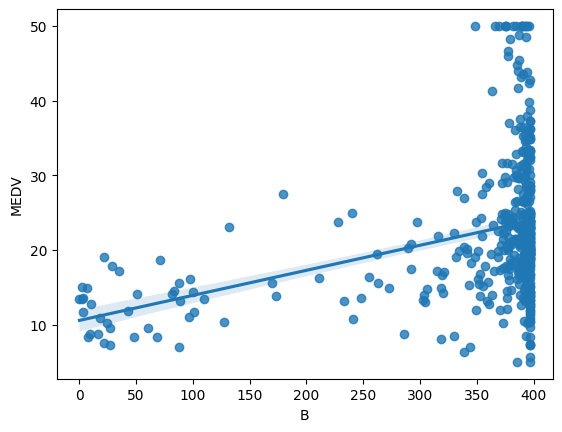

----------------------------------------------------------------------------------------------------


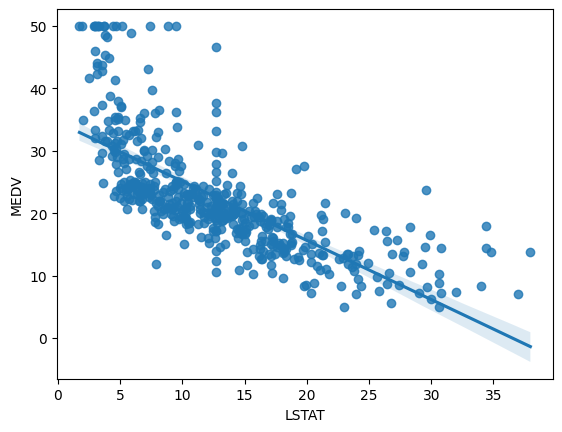

----------------------------------------------------------------------------------------------------


In [16]:
print('-'*100)
for i in range(len(a)):
    sns.regplot(x=a[i], y=df['MEDV'], data=df)
    plt.show()
    print('-'*100)

## **Train test split**

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [18]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [19]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print('shape of X_train : ', X_train.shape)
print('shape of y_train : ', y_train.shape)
print('shape of X_test : ', X_test.shape)
print('shape of y_test : ', y_test.shape)

shape of X_train :  (404, 13)
shape of y_train :  (404,)
shape of X_test :  (102, 13)
shape of y_test :  (102,)


In [22]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

## **Model Training**

-    1) Linear Regression
-    2) Ridge Regression
-    3) Lasso Regression
-    4) ElasticNet Regression
-    5) SVR model
-    6) Descision tree
-    7) Random forest
-    8) Gradient Boosting Regressor
-    9) Kernel Ridge

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate Adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    
    return {
        'R2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'Adjusted R2': adjusted_r2
    }

def best_model(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet Regression': ElasticNet(),
        'SVR': SVR(kernel='rbf'),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'Kernel Ridge': KernelRidge(kernel='rbf')
    }
    
    best_model = None
    best_metrics = None
    best_model_name = ''
    
    for model_name, model in models.items():
        grid_search = GridSearchCV(model, param_grid={}, cv=3)  # You can add hyperparameter grid here
        grid_search.fit(X_train, y_train.values.ravel())
        best_model = grid_search.best_estimator_
        metrics = evaluate_model(best_model, X_test, y_test)
        
        if best_metrics is None or metrics['R2'] > best_metrics['R2']:
            best_metrics = metrics
            best_model_name = model_name
    
    return best_model_name, best_model, best_metrics

In [28]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate Adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    
    return {
        'R2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'Adjusted R2': adjusted_r2
    }

def best_model(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'param_grid': {}  # You can add hyperparameter grid here
        },
        'Ridge Regression': {
            'model': Ridge(),
            'param_grid': {'alpha': [0.1, 1.0, 10.0]}
        },
        'Lasso Regression': {
            'model': Lasso(),
            'param_grid': {'alpha': [0.1, 1.0, 10.0]}
        },
        'ElasticNet Regression': {
            'model': ElasticNet(),
            'param_grid': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
        },
        'SVR': {
            'model': SVR(kernel='rbf'),
            'param_grid': {'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.2, 0.5]}
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'param_grid': {'max_depth': [None, 10, 20]}
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'param_grid': {'n_estimators': [50, 100, 200]}
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(),
            'param_grid': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
        },
        'Kernel Ridge': {
            'model': KernelRidge(kernel='rbf'),
            'param_grid': {'alpha': [0.1, 1.0, 10.0]}
        }
    }
    
    best_model = None
    best_metrics = None
    best_model_name = ''
    best_hyperparameters = None
    
    for model_name, model_info in models.items():
        model = model_info['model']
        param_grid = model_info['param_grid']
        
        grid_search = GridSearchCV(model, param_grid=param_grid, cv=3)
        grid_search.fit(X_train, y_train.values.ravel())
        best_model = grid_search.best_estimator_
        metrics = evaluate_model(best_model, X_test, y_test)
        
        if best_metrics is None or metrics['R2'] > best_metrics['R2']:
            best_metrics = metrics
            best_model_name = model_name
            best_hyperparameters = grid_search.best_params_
    
    return best_model_name, best_model, best_metrics, best_hyperparameters

In [29]:
best_model_name, best_model, best_metrics, best_hyperparameters=best_model(X_train, y_train, X_test, y_test)

In [30]:
print('Best Model Name : ', best_model_name)
print('Best Model : ', best_model)
print('Best Hyperparameters : ', best_hyperparameters)
print('-'*100)
best_metrics = [(key, value) for key, value in best_metrics.items()]
for key, value in best_metrics:
    print(f"Matric: {key}")
    print(f"Value: {value}")
    print('-'*100)

Best Model Name :  Gradient Boosting
Best Model :  KernelRidge(alpha=0.1, kernel='rbf')
Best Hyperparameters :  {'learning_rate': 0.1, 'n_estimators': 100}
----------------------------------------------------------------------------------------------------
Matric: R2
Value: 0.8986252311347191
----------------------------------------------------------------------------------------------------
Matric: MAE
Value: 1.8962082403955784
----------------------------------------------------------------------------------------------------
Matric: MSE
Value: 7.434195317894364
----------------------------------------------------------------------------------------------------
Matric: RMSE
Value: 2.726572081917946
----------------------------------------------------------------------------------------------------
Matric: Adjusted R2
Value: 0.8836494130068936
----------------------------------------------------------------------------------------------------


In [31]:
n_estimators = 100  
learning_rate = 0.1  
gradient_boosting_model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
gradient_boosting_model.fit(X_train, y_train.values.ravel()) 

prediction = gradient_boosting_model.predict(X_test)

In [37]:
r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print('-'*100)
print(f"R2_Score : {r2}")
print(f"Mean_Absolute_Error : {mae}")
print(f"Mean_Squared_Error : {mse}")
print(f"Root_Mean_Square_Error : {rmse}")
print(f"Adjusted_R2_Score : {adjusted_r2}")
print('-'*100)

----------------------------------------------------------------------------------------------------
R2_Score : 0.8995819069249646
Mean_Absolute_Error : 1.8877925486794325
Mean_Squared_Error : 7.3640386629377685
Root_Mean_Square_Error : 2.713676226622802
Adjusted_R2_Score : 0.8847474159025163
----------------------------------------------------------------------------------------------------


### Predicting New Data Point

In [39]:
a = np.array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [41]:
scaler.transform(a)

/home/kashyap/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4087143 ,  0.28425052, -1.28104103, -0.28423388, -0.15723342,
         0.365677  , -0.11607864,  0.13239061, -0.97404758, -0.65092617,
        -1.35597347,  0.44418004, -1.07937305]])

In [42]:
gradient_boosting_model.predict(scaler.transform(a))

/home/kashyap/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([26.45373578])

In [38]:
import pickle

In [44]:
pickle.dump(gradient_boosting_model,open('gradient_boosting_model.pkl','wb'))

In [45]:
pickled_model=pickle.load(open('gradient_boosting_model.pkl','rb'))

In [46]:
## Prediction
pickled_model.predict(scaler.transform(a))

/home/kashyap/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([26.45373578])